In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import models, layers, callbacks

In [ ]:
a = '/content/drive/MyDrive/Datasets/Fire-Detection/Fire/'
a1 = os.listdir(a)
b = '/content/drive/MyDrive/Datasets/Fire-Detection/No_Fire/'
b1 = os.listdir(b)
fire = []
no_fire = []

# Changing every image to black and white with size 75 by 75

for i in a1:
  i1 = cv.imread(a+i)
  # a_gray = cv.cvtColor(i1, cv.COLOR_BGR2GRAY)
  a_gray = cv.resize(i1, (75,75), interpolation = cv.INTER_AREA)
  fire.append(a_gray)

for i in b1:
  i1 = cv.imread(b+i)
  # b_gray = cv.cvtColor(i1, cv.COLOR_BGR2GRAY)
  b_gray = cv.resize(i1, (75,75), interpolation = cv.INTER_AREA)
  no_fire.append(b_gray)

In [ ]:
# Flipping each and every image

x = []
for i in fire:
  x.append(cv.flip(i, 1))
fire.extend(x)

x = []
for i in no_fire:
  x.append(cv.flip(i, 1))
no_fire.extend(x)

# Shuffling the dataset

fire1 = shuffle(fire.copy(), random_state = 42)
no_fire1 = shuffle(no_fire.copy(), random_state = 42)

In [ ]:
# Adding salt-pepper noise to all the fire images and 75% of all the non-fire images

x = []
y = len(fire1)
print(y)

for i in range(y):
  x1 = np.random.randint(0,2)
  x2 = np.random.randint(0, 40, fire1[i].shape, dtype = np.uint8)

  if x1==0:
    x3 = cv.subtract(fire1[i], x2)

  else:
    x3 = cv.add(fire1[i], x2)

  x.append(x3)
fire1.extend(x)

x = []
y = len(no_fire1)*3//4
print(y)

for i in range(y):
  x1 = np.random.randint(0,2)
  x2 = np.random.randint(0, 40, no_fire1[i].shape, dtype = np.uint8)

  if x1==0:
    x3 = cv.subtract(no_fire1[i], x2)

  else:
    x3 = cv.add(no_fire1[i], x2)

  x.append(x3)
no_fire1.extend(x)

# Shuffling the dataset

fire1 = shuffle(fire1, random_state = 50)
no_fire1 = shuffle(no_fire1, random_state = 78)

print(np.asarray(fire1).shape)
print(np.asarray(no_fire1).shape)

220
627
(440, 75, 75, 3)
(1463, 75, 75, 3)


In [ ]:
# Blurring all the fire images and 75% of all the non-fire in the dataset

x = []
y = len(fire1)
print(y)

for i in range(y):
  x1 = cv.GaussianBlur(fire1[i], (3, 3), 0)
  x.append(x1)
fire1.extend(x)

x = []
y = len(no_fire1)*3//4
print(y)

for i in range(y):
  x1 = cv.GaussianBlur(no_fire1[i], (3, 3), 0)
  x.append(x1)
no_fire1.extend(x)

# Shuffling the dataset

fire1 = shuffle(fire1, random_state = 55)
no_fire1 = shuffle(no_fire1, random_state = 44)

print(np.asarray(fire1).shape)
print(np.asarray(no_fire1).shape)

440
1097
(880, 75, 75, 3)
(2560, 75, 75, 3)


In [ ]:
# Changing the brightness and contrast of all images

x = []
y = []
z = len(fire1)//2
print(z)

for i in range(z):
  x1 = np.random.uniform(0.2, 2)
  x2 = np.array(fire1[i], dtype=np.float64)
  x3 = np.array([[[x1]*3]*75]*75)
  x4 = cv.multiply(x2, x3)
  x.append(x4)

  y1 = np.random.randint(30, 60)
  y2 = np.array([[[y1]*3]*75]*75, dtype=np.uint8)
  y3 = cv.add(fire1[z+i], y2)
  y.append(y3)
  
fire1.extend(x)
fire1.extend(y)

x = []
y = []
z = len(no_fire1)//2
print(z)

for i in range(z):
  x1 = np.random.uniform(0.2, 2)
  x2 = np.array(no_fire1[i], dtype=np.float64)
  x3 = np.array([[[x1]*3]*75]*75)
  x4 = cv.multiply(x2, x3)
  x.append(x4)

  y1 = np.random.randint(30, 60)
  y2 = np.array([[[y1]*3]*75]*75, dtype=np.uint8)
  y3 = cv.add(no_fire1[z+i], y2)
  y.append(y3)

no_fire1.extend(x)
no_fire1.extend(y)

# Shuffling the images

fire1 = shuffle(fire1, random_state = 50)
no_fire1 = shuffle(no_fire1, random_state = 78)

print(np.asarray(fire1).shape)
print(np.asarray(no_fire1).shape)

440
1280
(1760, 75, 75, 3)
(5120, 75, 75, 3)


In [ ]:
# Translating, Rotating and Zooming in/out some images

x = []
y = []
y1 = []
z = len(fire1)//3
print(z)

(h, w) = fire1[0].shape[:2]
(cX, cY) = (w // 2, h // 2)

for i in range(z):
  
  x00 = np.random.randint(-cX//2, cX//2)
  x01 = np.random.randint(-cY//2, cY//2)
  x1 = np.random.randint(-30, 30)
  x2 = np.random.uniform(0.5, 1.5)

  M0 = np.float32([[1, 0, x00], [0, 1, x01]])     # Random Translation
  M1 = cv.getRotationMatrix2D((cX, cY), x1, 1)    # Random Rotation
  M2 = cv.getRotationMatrix2D((cX, cY), 0, x2)    # Random Zoomng in/out

  r0 = cv.warpAffine(fire1[i], M0, (w, h))
  r1 = cv.warpAffine(fire1[z+i], M1, (w, h))
  r2 = cv.warpAffine(fire1[2*z+i], M2, (w, h))

  x.append(r0)
  y.append(r1)
  y1.append(r2)

fire1.extend(x)
fire1.extend(y)
fire1.extend(y1)

x = []
y = []
y1 = []
z = len(no_fire1)//3
print(z)

for i in range(z):
  
  x00 = np.random.randint(-cX//2, cX//2)
  x01 = np.random.randint(-cY//2, cY//2)
  x1 = np.random.randint(-30, 30)
  x2 = np.random.uniform(0.5, 1.5)

  M0 = np.float32([[1, 0, x00], [0, 1, x01]])     # Random Translation
  M1 = cv.getRotationMatrix2D((cX, cY), x1, 1)    # Random Rotation
  M2 = cv.getRotationMatrix2D((cX, cY), 0, x2)    # Random Zooming in/out

  r0 = cv.warpAffine(no_fire1[i], M0, (w, h))
  r1 = cv.warpAffine(no_fire1[z+i], M1, (w, h))
  r2 = cv.warpAffine(no_fire1[2*z+i], M2, (w, h))

  x.append(r0)
  y.append(r1)
  y1.append(r2)

no_fire1.extend(x)
no_fire1.extend(y)
no_fire1.extend(y1)

# Shuffling the images

fire1 = shuffle(fire1, random_state = 30)
no_fire1 = shuffle(no_fire1, random_state = 38)

print(np.asarray(fire1).shape)
print(np.asarray(no_fire1).shape)

586
1706
(3518, 75, 75, 3)
(10238, 75, 75, 3)


In [ ]:
net_images = []
net_images.extend(fire1)
net_images.extend(no_fire1)

print(np.asarray(net_images).shape)

(13756, 75, 75, 3)


In [ ]:
n_fire = np.asarray(fire1).shape[0]
n_no_fire = np.asarray(no_fire1).shape[0]

fire_label = ['Fire']*n_fire
no_fire_label = ['No Fire']*n_no_fire

net_label = []
net_label.extend(fire_label)
net_label.extend(no_fire_label)

le = LabelEncoder()
labels = le.fit_transform(net_label)

In [ ]:
labels = np.asarray(labels).reshape(-1, 1)
print(np.asarray(labels).shape)

(13756, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(net_images, labels, test_size=0.1, random_state=24)
print(np.asarray(X_train).shape)

(12380, 75, 75, 3)


In [ ]:
X_train = np.asarray(X_train).reshape(-1, 75, 75, 3)
X_test = np.asarray(X_test).reshape(-1, 75, 75, 3)

X_train_1 = X_train/255
X_test_1 = X_test/255

In [ ]:
# Building the actual model

model = models.Sequential([
    layers.Conv2D(32, 7, activation='relu', padding='same', strides=2, input_shape=(75, 75, 3)),
    layers.MaxPool2D(2),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPool2D(2),
    layers.Conv2D(96, 3, activation='relu', padding='same'),
    layers.Conv2D(96, 3, activation='relu', padding='same'),
    layers.Conv2D(96, 3, activation='relu', padding='same'),
    # layers.Conv2D(96, 3, activation='relu', padding='same'),
    # layers.MaxPool2D(2),
    # layers.Conv2D(128, 3, activation='relu', padding='same'),
    
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(45, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
ES = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train_1, y_train, epochs=30, validation_split=0.1, callbacks=[ES])

Epoch 1/30
349/349 [==============================] - 114s 319ms/step - loss: 0.4183 - accuracy: 0.8005 - val_loss: 0.3687 - val_accuracy: 0.8691
Epoch 2/30
349/349 [==============================] - 107s 308ms/step - loss: 0.2598 - accuracy: 0.8928 - val_loss: 0.1601 - val_accuracy: 0.9418
Epoch 3/30
349/349 [==============================] - 110s 314ms/step - loss: 0.1981 - accuracy: 0.9231 - val_loss: 0.1828 - val_accuracy: 0.9378
Epoch 4/30
349/349 [==============================] - 109s 312ms/step - loss: 0.1517 - accuracy: 0.9435 - val_loss: 0.0959 - val_accuracy: 0.9725
Epoch 5/30
349/349 [==============================] - 109s 312ms/step - loss: 0.1050 - accuracy: 0.9629 - val_loss: 0.0865 - val_accuracy: 0.9669
Epoch 6/30
349/349 [==============================] - 109s 312ms/step - loss: 0.0741 - accuracy: 0.9728 - val_loss: 0.0439 - val_accuracy: 0.9855
Epoch 7/30
349/349 [==============================] - 108s 310ms/step - loss: 0.0611 - accuracy: 0.9796 - val_loss: 0.0398 -

In [ ]:
y_pred = model.predict(X_test_1)

print(len(y_pred))
# print(y_pred[:10])

1376


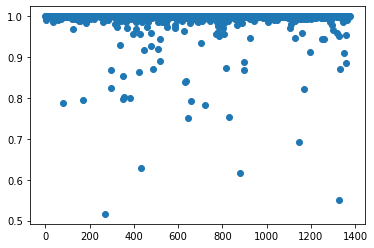

13
3
Accuracy:  0.9934593023255814
No. of correct predictions:  1367


In [ ]:
y_graph = []
y_pred_1 = []

for i in y_pred:
  y_graph.append(max(i[0], i[1]))
  if i[0]<i[1]:
    y_pred_1.append(1)
  else:
    y_pred_1.append(0)

x_axis = range(len(X_test_1))

plt.scatter(x_axis, y_graph)
plt.show()

j=0
for i in y_graph:
  if i<0.8:
    j+=1

print(j)

j=0
k=0
for i in range(len(y_pred_1)):
  if y_pred_1[i]==y_test[i]:
    j+=1
  else:
    # print(i, ' -> ', y_pred[i])
    if y_graph[i]<0.8:
      k+=1

print(k)
print("Accuracy: ", j/len(y_test))
print("No. of correct predictions: ", j)